In [1]:
import pandas as pd
import numpy as np
import os

file_locations = {
    'tpch': ['customer/orders_customer_optimal_rep.csv', 'orders/customer_orders_optimal_rep.csv', 
             'orders/lineitem_orders_optimal_rep.csv', 'part/lineitem_part_optimal_rep.csv', 
             'part/partsupp_part_optimal_rep.csv', 'partsupp/lineitem_partsupp_optimal_rep.csv', 
             'partsupp/part_partsupp_optimal_rep.csv', 'partsupp/supplier_partsupp_optimal_rep.csv', 
             'supplier/lineitem_supplier_optimal_rep.csv', 'supplier/partsupp_supplier_optimal_rep.csv'],
    'imdb': ['cast_info/title_cast_info_optimal_rep.csv',
             'movie_companies/title_movie_companies_optimal_rep.csv', 'movie_info/title_movie_info_optimal_rep.csv', 
             'movie_info_idx/title_movie_info_idx_optimal_rep.csv', 'movie_keyword/title_movie_keyword_optimal_rep.csv',
             'title/cast_info_title_optimal_rep.csv', 'title/movie_companies_title_optimal_rep.csv',
             'title/movie_info_idx_title_optimal_rep.csv', 'title/movie_info_title_optimal_rep.csv',
             'title/movie_keyword_title_optimal_rep.csv'
            ],
    'ssb': ['customer/lineorder_customer_optimal_rep.csv', 'ddate/lineorder_ddate_optimal_rep.csv', 
           'part/lineorder_part_optimal_rep.csv', 'supplier/lineorder_supplier_optimal_rep.csv'
           ]
}


datasets = ['ssb', 'tpch', 'imdb']



dfs = []


for d in datasets:
    for f in file_locations[d]:
        dfs.append(pd.read_csv(os.path.join("../data/", d, f)))

ds = pd.concat(dfs)
ds


,left_cardinality,left_cardinality_ratio,base_cardinality,selectivity_on_indexed_attr,left_ordered,base_ordered,result_size,sel_on_indexed_attr_with_join_predicate,hj_idx_cost,hj_seq_cost,nl_idx_cost,nl_seq_cost,mj_idx_cost,mj_seq_cost,optimal_decision
0,10800,0.360000,30000,0.908900,0,1,9816,0.454467,3078.65,2821.50,5701.00,4.418208e+06,2197.32,3906.91,4
1,3265,0.108833,30000,0.671800,0,1,2193,0.335900,1188.48,1172.10,3383.99,9.879785e+05,1207.18,2656.47,1
2,4860,0.162000,30000,0.562533,0,1,2734,0.281267,1002.33,1142.52,3874.45,1.231189e+06,1170.05,2504.54,0
3,7892,0.263067,30000,0.692467,0,1,5465,0.346233,1237.22,1229.92,4806.79,2.460164e+06,1613.73,3084.59,1
4,5875,0.195833,30000,0.308067,0,1,1810,0.154033,557.97,1041.66,4186.57,8.153604e+05,865.39,1956.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,249337,0.098618,2528312,0.481484,1,1,120056,0.240742,110942.47,123540.02,292249.65,8.607989e+09,89437.53,352096.40,4
1996,630771,0.249483,2528312,0.852889,1,1,537998,0.426444,198809.96,173656.13,463894.95,3.857394e+10,187256.88,610160.72,1
1997,314278,0.124303,2528312,0.956698,1,1,300681,0.478349,217297.85,176963.25,321473.10,2.155971e+10,157455.99,624699.01,4
1998,778601,0.307953,2528312,0.788704,1,1,614109,0.394352,186692.35,170107.88,530418.45,4.403258e+10,199352.37,594840.84,1


In [2]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
m_regression_model = RandomForestRegressor
m_classification_model = RandomForestClassifier

# Classification Task

In [7]:
all_features = ['left_cardinality', 'base_cardinality',
       'selectivity_on_indexed_attr', 'left_ordered', 'base_ordered',
       'result_size', 'sel_on_indexed_attr_with_join_predicate']

key_features = ['left_cardinality', 'base_cardinality',
       'result_size']

features = all_features

regression_targets = ['hj_idx_cost', 'hj_seq_cost', 'nl_idx_cost', 'nl_seq_cost', 'mj_idx_cost', 'mj_seq_cost']
classification_target = ['optimal_decision']


X = ds[features]
y = ds['optimal_decision']

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=1)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = m_classification_model(n_estimators=3, max_depth=5).fit(X_train, y_train)

acc = np.sum(clf.predict(X_test) == y_test) / len(y_test)
print(f"Test accuracy: %.2f%%" % (acc * 100))

Test accuracy: 80.45%


In [5]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<Figure size 640x480 with 1 Axes>

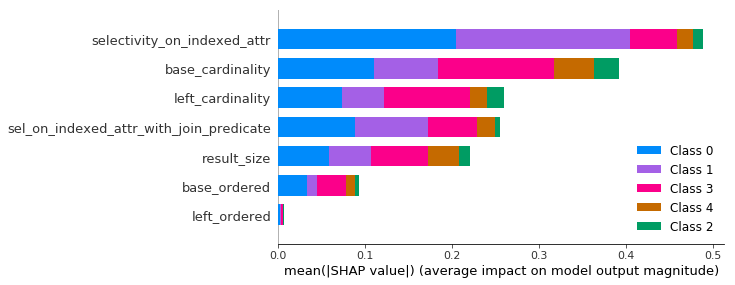

In [6]:
import shap

x_ds_train = pd.DataFrame(data=X_train[0:500], columns=features)

shap_values = shap.TreeExplainer(clf).shap_values(x_ds_train)
shap.summary_plot(shap_values, x_ds_train, plot_type="bar")

# Regression Task

In [11]:
all_features = ['left_cardinality', 'base_cardinality',
       'selectivity_on_indexed_attr', 'left_ordered', 'base_ordered',
       'result_size', 'sel_on_indexed_attr_with_join_predicate']

key_features = ['left_cardinality', 'base_cardinality',
       'result_size']


features = all_features

regression_targets = ['hj_idx_cost', 'hj_seq_cost', 'nl_idx_cost', 'nl_seq_cost','mj_idx_cost', 'mj_seq_cost']
classification_target = ['optimal_decision']


X = ds[features]
y = ds[regression_targets + classification_target]

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)

# X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
# Collect all the regressors
regressors = {}
feature_importances = np.zeros(len(features))
max_depth = 5

### Hash join + index scan

In [14]:
c_y_train = y_train['hj_idx_cost']
c_y_test = y_test['hj_idx_cost']

In [15]:
rgr = m_regression_model(n_estimators=3, max_depth=max_depth).fit(X_train, c_y_train)
regressors['hj_idx_cost'] = rgr

In [16]:
loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 2498.686935816032%


left_cardinality = 0.23858254094546769
base_cardinality = 0.7277872060562787
selectivity_on_indexed_attr = 0.0006190339198335079
left_ordered = 3.6267537068845e-06
base_ordered = 0.00033150213761439895
result_size = 0.03211574078438714
sel_on_indexed_attr_with_join_predicate = 0.0005603494027117092


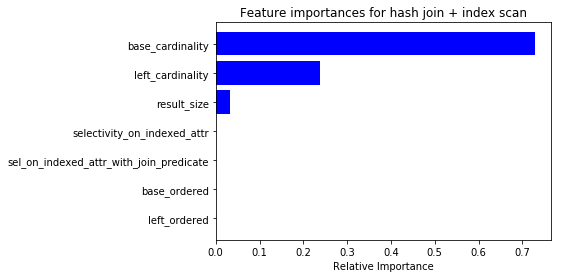

In [12]:
for name, importance in zip(features, rgr.feature_importances_):
    print(name, "=", importance)

import matplotlib.pyplot as plt

importances = rgr.feature_importances_
indices = np.argsort(importances)

feature_importances += importances

plt.title('Feature importances for hash join + index scan')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hash join + seq scan

In [13]:
c_y_train = y_train['hj_seq_cost']
c_y_test = y_test['hj_seq_cost']

In [14]:
rgr = m_regression_model(n_estimators=20, max_depth=max_depth).fit(X_train, c_y_train)
regressors['hj_seq_cost'] = rgr
loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 2.539101651259572%


left_cardinality = 0.25196599114853485
base_cardinality = 0.7254581513998716
selectivity_on_indexed_attr = 0.0006098558319388676
left_ordered = 2.1491492796988505e-06
base_ordered = 0.0005281131926727744
result_size = 0.020937179436571703
sel_on_indexed_attr_with_join_predicate = 0.0004985598411306321


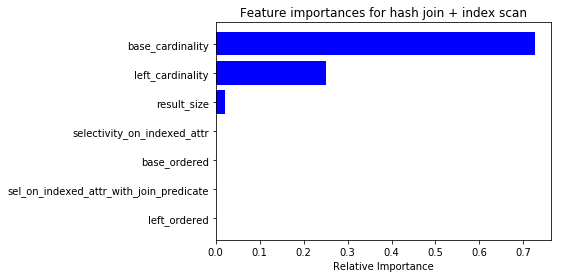

In [15]:
for name, importance in zip(features, rgr.feature_importances_):
    print(name, "=", importance)

import matplotlib.pyplot as plt

importances = rgr.feature_importances_
indices = np.argsort(importances)

feature_importances += importances

plt.title('Feature importances for hash join + index scan')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Nested loop + idx scan

In [16]:
c_y_train = y_train['nl_idx_cost']
c_y_test = y_test['nl_idx_cost']

In [17]:
rgr = m_regression_model(n_estimators=20, max_depth=max_depth).fit(X_train, c_y_train)
regressors['nl_idx_cost'] = rgr
loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 1.8375765540495332%


left_cardinality = 8.024874474539038e-05
base_cardinality = 0.31131343855163485
selectivity_on_indexed_attr = 1.711071504035511e-05
left_ordered = 3.5880396775090175e-07
base_ordered = 1.2803097054796736e-05
result_size = 0.6885531340015469
sel_on_indexed_attr_with_join_predicate = 2.2906086010050662e-05


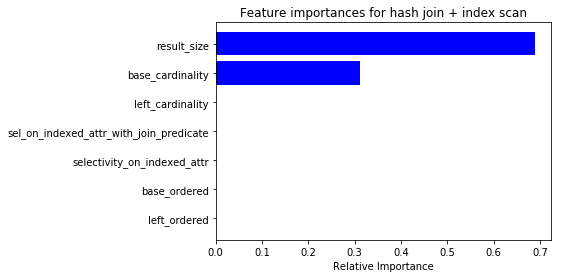

In [18]:
for name, importance in zip(features, rgr.feature_importances_):
    print(name, "=", importance)

import matplotlib.pyplot as plt

importances = rgr.feature_importances_
indices = np.argsort(importances)

feature_importances += importances

plt.title('Feature importances for hash join + index scan')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### nested loop + seq scan

In [19]:
c_y_train = y_train['nl_seq_cost']
c_y_test = y_test['nl_seq_cost']

In [20]:
rgr = m_regression_model(n_estimators=20, max_depth=max_depth).fit(X_train, c_y_train)
regressors['nl_seq_cost'] = rgr
loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 3.3734018364035596%


left_cardinality = 0.004352439338400059
base_cardinality = 0.31513983717834343
selectivity_on_indexed_attr = 0.000811907613330008
left_ordered = 8.694788736045672e-07
base_ordered = 0.000311562283710036
result_size = 0.6793427601410984
sel_on_indexed_attr_with_join_predicate = 4.0623966244518296e-05


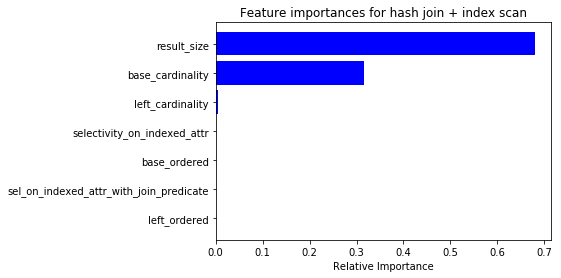

In [21]:
for name, importance in zip(features, rgr.feature_importances_):
    print(name, "=", importance)

import matplotlib.pyplot as plt

importances = rgr.feature_importances_
indices = np.argsort(importances)

feature_importances += importances

plt.title('Feature importances for hash join + index scan')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### merge join + index scan

In [22]:
c_y_train = y_train['mj_idx_cost']
c_y_test = y_test['mj_idx_cost']

In [23]:
rgr = m_regression_model(n_estimators=20, max_depth=max_depth).fit(X_train, c_y_train)
regressors['mj_idx_cost'] = rgr

loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 4.515141724926611%


left_cardinality = 0.000977525971914371
base_cardinality = 0.7344626978049635
selectivity_on_indexed_attr = 0.14424958593468518
left_ordered = 6.778126942341169e-06
base_ordered = 7.567197955544682e-05
result_size = 0.06060759474756565
sel_on_indexed_attr_with_join_predicate = 0.05962014543437344


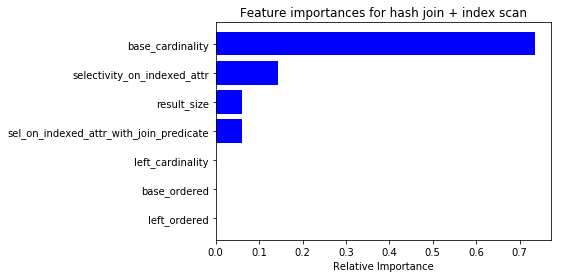

In [24]:
for name, importance in zip(features, rgr.feature_importances_):
    print(name, "=", importance)

import matplotlib.pyplot as plt

importances = rgr.feature_importances_
indices = np.argsort(importances)

feature_importances += importances

plt.title('Feature importances for hash join + index scan')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### merge join + seq scan

In [25]:
c_y_train = y_train['mj_seq_cost']
c_y_test = y_test['mj_seq_cost']

In [26]:
rgr = m_regression_model(n_estimators=20, max_depth=max_depth).fit(X_train, c_y_train)
regressors['mj_seq_cost'] = rgr

loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 2.5502933959586866%


left_cardinality = 0.001204011754009948
base_cardinality = 0.7666939810717455
selectivity_on_indexed_attr = 0.08361961891557709
left_ordered = 6.2704421975012265e-06
base_ordered = 0.0005220179295950037
result_size = 0.05766438899641657
sel_on_indexed_attr_with_join_predicate = 0.09028971089045827


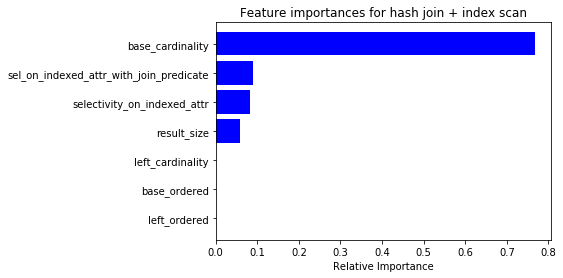

In [27]:
for name, importance in zip(features, rgr.feature_importances_):
    print(name, "=", importance)

import matplotlib.pyplot as plt

importances = rgr.feature_importances_
indices = np.argsort(importances)

feature_importances += importances

plt.title('Feature importances for hash join + index scan')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Use Regression model to do classification

In [28]:
predict_test = []
operators = ['hj_idx_cost', 'hj_seq_cost', 'nl_idx_cost', 'nl_seq_cost','mj_idx_cost', 'mj_seq_cost']

for op_idx, op in enumerate(operators) :
    predict_test.append(regressors[op].predict(X_test))
    
results = np.stack(predict_test, axis=1)
acc = np.sum(np.argmin(results, axis=1).reshape(-1,1).flatten() == y_test['optimal_decision'].to_numpy().flatten()) / len(y_test)
print("Test accuracy using all learned costs: %.2f%%" % (acc*100))

Test accuracy using all learned costs: 97.04%


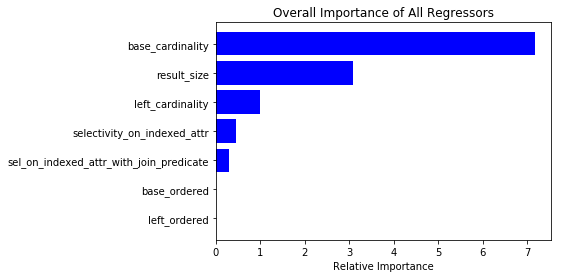

In [29]:
indices = np.argsort(feature_importances)

feature_importances += feature_importances

plt.title('Overall Importance of All Regressors')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
[estimator.tree_.node_count for estimator in regressors['mj_seq_cost'].estimators_]

[30919,
 30875,
 30617,
 30851,
 30705,
 30919,
 30907,
 30971,
 31011,
 31133,
 31007,
 30929,
 30847,
 30773,
 31005,
 31007,
 30873,
 30819,
 30861,
 31059]